In [2]:
import GenBioX.data_preprocessing as dp
import GenBioX.statistical_analysis as sa
import GenBioX.alignment as a
import GenBioX.annotation as an
import GenBioX.variant_analysis as va
import GenBioX.gene_expression as ge
import GenBioX.comparative_genomics as ca

/Users/li/opt/anaconda3/lib/python3.9/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [3]:
# reading a fasta file

seq = dp.read_fasta('seq.fasta')
seq

['TTTTTTTTTTTAGTAGACACAGGGTTTCACCATGCCGGCCAGGCTGGTCTCAAACTCCTGACCTCAGGTGATCCGCCAATCTCAGCCCCCCAAAATGCTGAAATTACAGACATGAGCCACACGCACCCGGCCTATGCATCCTCTTTTCTAATTGTCCTATAATAAATATTCTATCCTCTCTCTGAGATGACCTTATAGAAACAGCAATGGTTTGGAGAATCTGTAGTCCTGGGTTCAGATTCCACTTCTGCCACTTGTCTAGTTATGGGACTCCTGTAGACCTCTGTTGCTCTTATGTAAGATAGTTTCTATGTCATGAAAGTGAAAATGGGATCAGGTATGTAAAGTACCTAGCAG']

In [4]:
# fasta Quality Check

qc = dp.fasta_quality_check(seq)
print(qc)


{'Sequence_1': {'length': 357, 'nucleotide_counts': {'A': 91, 'C': 86, 'G': 70, 'T': 110}, 'GC_content': 0.4369747899159664, 'status': 'Passes quality check'}}


In [5]:
# fasta Quality Score

qs = dp.quality_score(seq)
print(qs)

[0]


In [6]:
# Trim Adapters

ts = dp.trim_adapters(seq, adapter='AAGA')
print(ts)

['TTTTTTTTTTTAGTAGACACAGGGTTTCACCATGCCGGCCAGGCTGGTCTCAAACTCCTGACCTCAGGTGATCCGCCAATCTCAGCCCCCCAAAATGCTGAAATTACAGACATGAGCCACACGCACCCGGCCTATGCATCCTCTTTTCTAATTGTCCTATAATAAATATTCTATCCTCTCTCTGAGATGACCTTATAGAAACAGCAATGGTTTGGAGAATCTGTAGTCCTGGGTTCAGATTCCACTTCTGCCACTTGTCTAGTTATGGGACTCCTGTAGACCTCTGTTGCTCTTATGT']


In [7]:
# Remove Duplicates 

data = dp.remove_duplicates(seq)
print(data)

Removed 0 duplicate sequences.
['TTTTTTTTTTTAGTAGACACAGGGTTTCACCATGCCGGCCAGGCTGGTCTCAAACTCCTGACCTCAGGTGATCCGCCAATCTCAGCCCCCCAAAATGCTGAAATTACAGACATGAGCCACACGCACCCGGCCTATGCATCCTCTTTTCTAATTGTCCTATAATAAATATTCTATCCTCTCTCTGAGATGACCTTATAGAAACAGCAATGGTTTGGAGAATCTGTAGTCCTGGGTTCAGATTCCACTTCTGCCACTTGTCTAGTTATGGGACTCCTGTAGACCTCTGTTGCTCTTATGTAAGATAGTTTCTATGTCATGAAAGTGAAAATGGGATCAGGTATGTAAAGTACCTAGCAG']


# Module 2 -- Statistical Analysis

In [8]:
# Translate Nucleotide into Protein

t = sa.translate(seq)
t

['FFFLVDTGFHHAGQAGLKLLTSGDPPISAPQNAEITDMSHTHPAYASSFLIVL**IFYPLSEMTL*KQQWFGESVVLGSDSTSATCLVMGLL*TSVALM*DSFYVMKVKMGSGM*ST*Q']

In [9]:
# reverse complement of a sequence 

r = sa.reverse_complement('TTTTTTTTTTTAGTAGACACAGGGTTTCACCATGCCGGCCAGGCTGGTCTCAAACTCCTGACCTCAGGTGATCCGCCAATCTCAGCCCCCCAAAATGCTGAAATTACAGACATGAGCCACACGCACCCGGCCTATGCATCCTCTTTTCTAATTGTCCTATAATAAATATTCTATCCTCTCTCTGAGATGACCTTATAGAAACAGCAATGGTTTGGAGAATCTGTAGTCCTGGGTTCAGATTCCACTTCTGCCACTTGTCTAGTTATGGGACTCCTGTAGACCTCTGTTGCTCTTATGTAAGATAGTTTCTATGTCATGAAAGTGAAAATGGGATCAGGTATGTAAAGTACCTAGCAG')
r

'CTGCTAGGTACTTTACATACCTGATCCCATTTTCACTTTCATGACATAGAAACTATCTTACATAAGAGCAACAGAGGTCTACAGGAGTCCCATAACTAGACAAGTGGCAGAAGTGGAATCTGAACCCAGGACTACAGATTCTCCAAACCATTGCTGTTTCTATAAGGTCATCTCAGAGAGAGGATAGAATATTTATTATAGGACAATTAGAAAAGAGGATGCATAGGCCGGGTGCGTGTGGCTCATGTCTGTAATTTCAGCATTTTGGGGGGCTGAGATTGGCGGATCACCTGAGGTCAGGAGTTTGAGACCAGCCTGGCCGGCATGGTGAAACCCTGTGTCTACTAAAAAAAAAAA'

In [10]:
# Nucleotide Count

dna_sequence = "TTTTTTTTTTTAGTAGACACAGGGTTTCACCATGCCGGCCAGGCTGGTCTCAAACTCCTGACCTCAGGTGATCCGCCAATCTCAGCCCCCCAAAATGCTGAAATTACAGACATGAGCCACACGCACCCGGCCTATGCATCCTCTTTTCTAATTGTCCTATAATAAATATTCTATCCTCTCTCTGAGATGACCTTATAGAAACAGCAATGGTTTGGAGAATCTGTAGTCCTGGGTTCAGATTCCACTTCTGCCACTTGTCTAGTTATGGGACTCCTGTAGACCTCTGTTGCTCTTATGTAAGATAGTTTCTATGTCATGAAAGTGAAAATGGGATCAGGTATGTAAAGTACCTAGCAG"
count = sa.count_nucleotides(dna_sequence)
print(count)

{'A': 91, 'C': 86, 'G': 70, 'T': 110}


In [11]:
# GC Content of a sequence 

gc = sa.calculate_gc_content(dna_sequence)
print(gc)

43.69747899159664


# Module 3 -- Alignment

In [12]:
# alignment 
# also can add a ref genome like this aligned_seq = align(nucleotide_list, ref_genome='AGCTGATCGTGACTGCATGCA...')


a1 = a.align(dna_sequence)
print(a1)

Alignment(seqA='-----------A-T---C---G...-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------', seqB='TTTTTTTTTTTAGTAGACACAG---GGTTTCACCATGCCGGCCAGGCTGGTCTCAAACTCCTGACCTCAGGTGATCCGCCAATCTCAGCCCCCCAAAATGCTGAAATTACAGACATGAGCCACACGCACCCGGCCTATGCATCCTCTTTTCTAATTGTCCTATAATAAATATTCTATCCTCTCTCTGAGATGACCTTATAGAAACAGCAATGGTTTGGAGAATCTGTAGTCCTGGGTTCAGATTCCACTTCTGCCACTTGTCTAGTTATGGGACTCCTGTAGACCTCTGTTGCTCTTATGTAAGATAGTTTCTATGTCATGAAAGTGAAAATGGGATCAGGTATGTAAAGTACCTAGCAG', score=4.0, start=0, end=360)


In [13]:
# pairwise alignment 
# To use the function, simply call it with the filenames of your two FASTA sequence files:

pal = a.pairwise_alignment("seq.fasta", "seq2.fasta")

TTTTTTTTTTTAGTAGACAC-AGGGTTTC-AC-CATGCCGGCCAGGCTGGTCTCAA-AC-TCC--T-GACCTCAGGTGATC-C-G---C--CAATCTCAGCCCCCCAAAATGCTGAAATTACA-GA-CATGAGCCACACGCACCCG-GCCTATGCATCCTCTTTTCTAATTGTCCTATAATAAATATTCTATCCTCTCTCTGA-GATGACCTTATAGAAACAGCAATGGTTTGGAGAATCTGTAGTCCTGGGTTCAGATTCCACTTCT-GCCACTTGTCTAGTTATGGGACTCCTGTAGACCTCTGTTGCTCTTATGTAAGATAGTTTCTATGTCATGAAAGTGAAAATGGGATCAGGTATGTAAAGTACCTAGCAG
|||||||||||..|....|| ||....|| || ||.| .|||.....|..|..||. |. |..  | ||....||||.||. | |   |  |||||||||...|.|..|..|||.|.||.|.. || |||....|.|....|.... ||.|.||.|.||.|.|.|.|..|.||.|.|.|.|....|.|..||..|.|.||||. ||..|..|||.| |||||..||....||..||.....|||..||| ..|| ..|||...|||.| |..|..|.| | | |.|..|..|||.|| |   |.|..|| ||..||..||.|.| ..| | || .| .|.||| |||..|.|||  ..|||.|..||....||..|.
TTTTTTTTTTTTTTTTTAACCAGCCACTCTACTCAAG-GGGCATATATTTTGGCATGAGGTGGGATAGAGGATAGGTCATTGCTGTAACTTCAATCTCAGTTACTCTCAGGGCTCACATGATGTGAACATTTTGCTCTGTGATTGTAGCATTTGAAGCCACGTATTTTTTGGTGCCACATTGCCAAGTAAATGTTTTATCTGTTGAACAAGTTAGA-AAACATTAAACTCTTTAAGCTGGAGTA

TTT-TTTTTTTTAGTAGACACAGGGTTTC-AC-CATGCCGGCC-AGGC-TGGTCTCAAACTCC--T-GACCTCAGGTGATC-C-G---C--CAATCTCAGCCCCCCAAAATGCTGAAATTACA-GA-CATGAGCCACACGCACCCG-GCCTATGCATCCTCTTTTCTAATTGTCCTATAATAAATATTCTATCCTCTCTCTGA-GATGACCTTATAGAAACAGCAATGGTTTGGAGAATCTGTAGTCCTGGGTTCAGATTCCACTTCT-GCCACTTGTCTAGTTATGGGACTCCTGTAGACCTCTGTTGCTCTTATGTAAGATAGTTTCTATGTCATGAAAGTGAAAATGGGATCAGGTATGTAAAGTACCTAGCAG
||| ||||||||..|..|..|||....|| || ||.|. |||. |... |.|.|...|..|..  | ||....||||.||. | |   |  |||||||||...|.|..|..|||.|.||.|.. || |||....|.|....|.... ||.|.||.|.||.|.|.|.|..|.||.|.|.|.|....|.|..||..|.|.||||. ||..|..|||.| |||||..||....||..||.....|||..||| ..|| ..|||...|||.| |..|..|.| | | |.|..|..|||.|| |   |.|..|| ||..||..||.|.| ..| | || .| .|.||| |||..|.|||  ..|||.|..||....||..|.
TTTTTTTTTTTTTTTTTAACCAGCCACTCTACTCAAGG-GGCATATATTTTGGCATGAGGTGGGATAGAGGATAGGTCATTGCTGTAACTTCAATCTCAGTTACTCTCAGGGCTCACATGATGTGAACATTTTGCTCTGTGATTGTAGCATTTGAAGCCACGTATTTTTTGGTGCCACATTGCCAAGTAAATGTTTTATCTGTTGAACAAGTTAGA-AAACATTAAACTCTTTAAGCTGGAGTA

TTTTTT-TTTTTAGTAGACACAGGGTTTC-AC-CATGCCGGCCAGGCTGGTCTCAA-A-CTC-C-T-GACCTCAGGTGATC-C-G---C--CAATCTCAGCCCCCCAAAATGCTGAAATTACA-GA-CATGAGCCACACGCACCCG-GCCTATGCATCCTCTTTTCTAATTGTCCTATAATAAATATTCTATCCTCTCTCTGA-GATGACCTTATAGAAACAGCAATGGTTTGGAGAATCTGTAGTCCTGGGTTCAGATTCCACTTCT-GCCACTTGTCTAGTTATGGGACTCCTGTAGACCTCTGTTGCTCTTATGTAAGATAGTTTCTATGTCATGAAAGTGAAAATGGGATCAGGTATGTAAAGTACCTAGCAG
|||||| |||||..|..|..|||....|| || ||.|. |||.....|..|..||. | .|. . | ||....||||.||. | |   |  |||||||||...|.|..|..|||.|.||.|.. || |||....|.|....|.... ||.|.||.|.||.|.|.|.|..|.||.|.|.|.|....|.|..||..|.|.||||. ||..|..|||.| |||||..||....||..||.....|||..||| ..|| ..|||...|||.| |..|..|.| | | |.|..|..|||.|| |   |.|..|| ||..||..||.|.| ..| | || .| .|.||| |||..|.|||  ..|||.|..||....||..|.
TTTTTTTTTTTTTTTTTAACCAGCCACTCTACTCAAGG-GGCATATATTTTGGCATGAGGTGGGATAGAGGATAGGTCATTGCTGTAACTTCAATCTCAGTTACTCTCAGGGCTCACATGATGTGAACATTTTGCTCTGTGATTGTAGCATTTGAAGCCACGTATTTTTTGGTGCCACATTGCCAAGTAAATGTTTTATCTGTTGAACAAGTTAGA-AAACATTAAACTCTTTAAGCTGGAGTA

In sequence alignment, the score is a numerical value that reflects the degree of similarity or dissimilarity between two sequences. The higher the score, the greater the similarity between the sequences.

In the case of pairwise sequence alignment, the score represents the similarity between the two sequences being aligned. The specific method used to calculate the score depends on the scoring system being used, such as BLOSUM or PAM matrices.

Regarding the repetitive output, it is possible that the function is generating all possible alignments and showing them in the output. You can try changing the function parameters, such as the gap penalties and scoring system, to see if that produces a more concise and informative output. Additionally, you can try visualizing the alignment using software tools such as Jalview or CLC Bio to get a better understanding of the alignment result.

In [14]:
# You can also specify the gap penalty, match score, and mismatch penalty by passing them as arguments to the function, as shown below:

pal2 = a.pairwise_alignment("seq.fasta", "seq2.fasta", gap_penalty=-10, match_score=5, mismatch_penalty=-4)

TTTTTTTTTTTAGTAGACAC-AGGGTTTC-AC-CATGCCGGCCAGGCTGGTCTCAA-AC-TCC--T-GACCTCAGGTGATC-C-G---C--CAATCTCAGCCCCCCAAAATGCTGAAATTACA-GA-CATGAGCCACACGCACCCG-GCCTATGCATCCTCTTTTCTAATTGTCCTATAATAAATATTCTATCCTCTCTCTGA-GATGACCTTATAGAAACAGCAATGGTTTGGAGAATCTGTAGTCCTGGGTTCAGATTCCACTTCT-GCCACTTGTCTAGTTATGGGACTCCTGTAGACCTCTGTTGCTCTTATGTAAGATAGTTTCTATGTCATGAAAGTGAAAATGGGATCAGGTATGTAAAGTACCTAGCAG
|||||||||||..|....|| ||....|| || ||.| .|||.....|..|..||. |. |..  | ||....||||.||. | |   |  |||||||||...|.|..|..|||.|.||.|.. || |||....|.|....|.... ||.|.||.|.||.|.|.|.|..|.||.|.|.|.|....|.|..||..|.|.||||. ||..|..|||.| |||||..||....||..||.....|||..||| ..|| ..|||...|||.| |..|..|.| | | |.|..|..|||.|| |   |.|..|| ||..||..||.|.| ..| | || .| .|.||| |||..|.|||  ..|||.|..||....||..|.
TTTTTTTTTTTTTTTTTAACCAGCCACTCTACTCAAG-GGGCATATATTTTGGCATGAGGTGGGATAGAGGATAGGTCATTGCTGTAACTTCAATCTCAGTTACTCTCAGGGCTCACATGATGTGAACATTTTGCTCTGTGATTGTAGCATTTGAAGCCACGTATTTTTTGGTGCCACATTGCCAAGTAAATGTTTTATCTGTTGAACAAGTTAGA-AAACATTAAACTCTTTAAGCTGGAGTA

TT-TTTTTTTTTAGTAGACACAGGGTTTC-AC-CATGCCGGCC-AGGC-TGGTCTCAAACTCC--T-GACCTCAGGTGATC-C-G---C--CAATCTCAGCCCCCCAAAATGCTGAAATTACA-GA-CATGAGCCACACGCACCCG-GCCTATGCATCCTCTTTTCTAATTGTCCTATAATAAATATTCTATCCTCTCTCTGA-GATGACCTTATAGAAACAGCAATGGTTTGGAGAATCTGTAGTCCTGGGTTCAGATTCCACTTCT-GCCACTTGTCTAGTTATGGGACTCCTGTAGACCTCTGTTGCTCTTATGTAAGATAGTTTCTATGTCATGAAAGTGAAAATGGGATCAGGTATGTAAAGTACCTAGCAG
|| |||||||||..|..|..|||....|| || ||.|. |||. |... |.|.|...|..|..  | ||....||||.||. | |   |  |||||||||...|.|..|..|||.|.||.|.. || |||....|.|....|.... ||.|.||.|.||.|.|.|.|..|.||.|.|.|.|....|.|..||..|.|.||||. ||..|..|||.| |||||..||....||..||.....|||..||| ..|| ..|||...|||.| |..|..|.| | | |.|..|..|||.|| |   |.|..|| ||..||..||.|.| ..| | || .| .|.||| |||..|.|||  ..|||.|..||....||..|.
TTTTTTTTTTTTTTTTTAACCAGCCACTCTACTCAAGG-GGCATATATTTTGGCATGAGGTGGGATAGAGGATAGGTCATTGCTGTAACTTCAATCTCAGTTACTCTCAGGGCTCACATGATGTGAACATTTTGCTCTGTGATTGTAGCATTTGAAGCCACGTATTTTTTGGTGCCACATTGCCAAGTAAATGTTTTATCTGTTGAACAAGTTAGA-AAACATTAAACTCTTTAAGCTGGAGTA

TTTTTTTTTT-TAGTAGACACAGGGTTTC-AC-CATGCCGGCCAGGCTGGTCTCA-AA-CTC-C-T-GACCTCAGGTGATC-C-G---C--CAATCTCAGCCCCCCAAAATGCTGAAATTACA-GA-CATGAGCCACACGCACCCG-GCCTATGCATCCTCTTTTCTAATTGTCCTATAATAAATATTCTATCCTCTCTCTGA-GATGACCTTATAGAAACAGCAATGGTTTGGAGAATCTGTAGTCCTGGGTTCAGATTCCACTTCT-GCCACTTGTCTAGTTATGGGACTCCTGTAGACCTCTGTTGCTCTTATGTAAGATAGTTTCTATGTCATGAAAGTGAAAATGGGATCAGGTATGTAAAGTACCTAGCAG
|||||||||| |..|..|..|||....|| || ||.| .|||.....|..|..|| .| .|. . | ||....||||.||. | |   |  |||||||||...|.|..|..|||.|.||.|.. || |||....|.|....|.... ||.|.||.|.||.|.|.|.|..|.||.|.|.|.|....|.|..||..|.|.||||. ||..|..|||.| |||||..||....||..||.....|||..||| ..|| ..|||...|||.| |..|..|.| | | |.|..|..|||.|| |   |.|..|| ||..||..||.|.| ..| | || .| .|.||| |||..|.|||  ..|||.|..||....||..|.
TTTTTTTTTTTTTTTTTAACCAGCCACTCTACTCAAG-GGGCATATATTTTGGCATGAGGTGGGATAGAGGATAGGTCATTGCTGTAACTTCAATCTCAGTTACTCTCAGGGCTCACATGATGTGAACATTTTGCTCTGTGATTGTAGCATTTGAAGCCACGTATTTTTTGGTGCCACATTGCCAAGTAAATGTTTTATCTGTTGAACAAGTTAGA-AAACATTAAACTCTTTAAGCTGGAGTA

In [15]:
from Bio import AlignIO

#You need to create an Alignment object from the alignment file
#before you can use it with the extract_conserved_regions function.

# Read the alignment file
with open("msa.aln.txt", "r") as f:
    alignment = AlignIO.read(f, "clustal")

In [16]:
# Exctract Conserved Regions 


conserved_regions = a.extract_conserved_regions(alignment)
print(conserved_regions)

[(3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10), (11, 11), (12, 12), (13, 13), (16, 16), (17, 17), (20, 20), (21, 21), (27, 27), (29, 29), (33, 33), (34, 34), (36, 36), (39, 39), (43, 43), (49, 49), (50, 50), (51, 51), (54, 54), (65, 65), (67, 67), (73, 73), (76, 76), (80, 80), (82, 82), (83, 83), (87, 87), (90, 90), (91, 91), (92, 92), (93, 93), (94, 94), (95, 95), (96, 96), (97, 97), (98, 98), (102, 102), (104, 104), (107, 107), (110, 110), (111, 111), (112, 112), (114, 114), (116, 116), (117, 117), (119, 119), (125, 125), (129, 129), (132, 132), (133, 133), (139, 139), (146, 146), (147, 147), (149, 149), (151, 151), (152, 152), (154, 154), (156, 156), (157, 157), (159, 159), (161, 161), (163, 163), (165, 165), (168, 168), (170, 170), (171, 171), (173, 173), (175, 175), (177, 177), (179, 179), (184, 184), (186, 186), (189, 189), (190, 190), (193, 193), (195, 195), (197, 197), (198, 198), (199, 199), (200, 200), (222, 222), (226, 226), (227, 227), (228, 228), (230, 2

This output indicates the start and end positions of conserved regions in the alignment. Each line represents a single conserved region, with the format "Conserved region: start-end". For example, "Conserved region: 3-3" means that a conserved region was found in the alignment starting at position 3 and ending at position 3.

In this case, the output shows that only single positions are conserved, as there are no regions that span more than one position. This may be due to the particular sequences being aligned, or could be indicative of a high degree of sequence divergence.

In [17]:
# evaluate alignment quality 

aln_quality = a.evaluate_alignment_quality(alignment)
print(aln_quality)

{'coverage': 0.27002583979328165, 'accuracy': 0.3850129198966408, 'gap_distribution': 0.15503875968992248}


the result of evaluate_alignment_quality provides a quantitative evaluation of the quality of an alignment. It includes the following metrics:

Coverage: This is the fraction of positions in the reference sequence that are covered by the alignment. A coverage of 1.0 means that all positions in the reference sequence are covered by the alignment.

Accuracy: This is the fraction of correctly aligned positions in the alignment. It is computed by counting the number of positions in the alignment that match the reference sequence divided by the total number of aligned positions.

Gap distribution: This is a measure of the distribution of gaps in the alignment. It is computed as the fraction of gaps in the alignment that are not adjacent to another gap. A gap distribution of 0.0 means that all gaps are adjacent to another gap, while a gap distribution of 1.0 means that all gaps are isolated.
In the given result, the coverage is 0.270, which means that only about 27% of the positions in the reference sequence are covered by the alignment. The accuracy is 0.385, which means that 38.5% of the aligned positions are correctly aligned. The gap distribution is 0.155, which means that about 15.5% of the gaps in the alignment are not adjacent to another gap. These results suggest that the alignment may need further improvement.





# Module 4 -- Annotation

Genome annotation is the process of identifying the functional elements of a genome, such as genes, regulatory elements, and other DNA sequences that play a role in the genome's function. The goal of genome annotation is to interpret the genetic information stored in the DNA sequence of an organism and to provide a comprehensive and accurate description of the gene structure, location, and function.

Genome annotation is a crucial step in understanding the genetic basis of biological processes, such as development, disease, and evolution. The process involves using computational algorithms and experimental techniques to identify and characterize the different features of a genome, including protein-coding genes, non-coding RNA genes, regulatory elements, and repetitive sequences. The resulting annotated genome provides a framework for functional analysis and comparative genomics, and serves as a valuable resource for researchers studying different aspects of the organism.

In [18]:
# Extract Annotations 

annotations = an.extract_annotations('ann.gb')
print(annotations)

[{'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'glutamate 5-kinase'}, {'product': 'hypothetical protein'}, {'product': 'stress-responsive nuclear envelope protein'}, {'product': 'major capsid protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'head morphogenesis protein'}, {'product': 'hypothetical protein'}, {'product': 'phage terminase, large subunit'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {

In [19]:
# filter Annotations 


fiter_dict = {'product': 'hypothetical protein'}
fa = an.filter_annotations(annotations, fiter_dict)
print(fa)

[{'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, {'product': 'hypothetical protein'}, 

takes a list of dictionaries representing annotations and a filter dictionary, and returns a filtered list of annotations

This should output a list containing only the dictionaries where the 'product' key has the value 'hypothetical protein'. If there are no such annotations in the original list, an empty list will be returned.

In [20]:
# Search Annotations

query = "aminoglycoside"
fa = an.search_annotations(annotations, query)
print(fa)

[{'product': 'aminoglycoside 3-N-acetyltransferase'}, {'product': '2-aminoglycoside phosphotransferase'}, {'product': 'aminoglycoside phosphotransferase'}, {'product': 'aminoglycoside phosphotransferase'}, {'product': 'aminoglycoside phosphotransferase'}]


takes a list of dictionaries as input and a query string to search for in the product field of each dictionary:

In [23]:
from Bio import SeqIO

def extract_genbank_info(filename):
    """
    Extracts gene names, products, and locations from a GenBank file.

    Args:
    filename (str): Name of the GenBank file.

    Returns:
    A list of dictionaries, where each dictionary represents a feature in the GenBank file.
    Each dictionary has the following keys: gene_name, product, and location.
    """
    features = []
    for record in SeqIO.parse(filename, "genbank"):
        for feature in record.features:
            if feature.type == "gene":
                gene_name = feature.qualifiers.get("gene", [""])[0]
                product = feature.qualifiers.get("product", [""])[0]
                location = str(feature.location)
                features.append({"gene_name": gene_name, "product": product, "location": location})
    return features


In [24]:
g = extract_genbank_info('ann.gb')
g

[{'gene_name': '', 'product': '', 'location': '[283:635](-)'},
 {'gene_name': '', 'product': '', 'location': '[684:1127](-)'},
 {'gene_name': '', 'product': '', 'location': '[1083:1455](-)'},
 {'gene_name': '', 'product': '', 'location': '[1426:1833](-)'},
 {'gene_name': '', 'product': '', 'location': '[1914:2373](-)'},
 {'gene_name': '', 'product': '', 'location': '[2470:2839](-)'},
 {'gene_name': '', 'product': '', 'location': '[2840:3230](-)'},
 {'gene_name': '', 'product': '', 'location': '[3234:3900](-)'},
 {'gene_name': '', 'product': '', 'location': '[3964:4921](-)'},
 {'gene_name': '', 'product': '', 'location': '[4948:5716](-)'},
 {'gene_name': '', 'product': '', 'location': '[5829:6021](-)'},
 {'gene_name': '', 'product': '', 'location': '[6238:6481](-)'},
 {'gene_name': '', 'product': '', 'location': '[6579:6858](-)'},
 {'gene_name': '', 'product': '', 'location': '[7016:8120](-)'},
 {'gene_name': '', 'product': '', 'location': '[8121:9573](-)'},
 {'gene_name': '', 'product'

In [54]:
import pandas as pd
from Bio import SeqIO

def extract_locations(genbank_file):
    annotations = []
    for record in SeqIO.parse(genbank_file, 'genbank'):
        for feature in record.features:
            if feature.type == 'gene':
                gene_name = feature.qualifiers.get('gene', [''])[0]
                location = str(feature.location)
                annotations.append({'gene_name': gene_name, 'location': location})
    return pd.DataFrame(annotations)


In [57]:
df = e('test.gb')
df

gene_name              location
0        PAU8      [<1806:>2169](-)
1                  [<2479:>2707](+)
2        SEO1      [<7234:>9016](-)
3                [<11564:>11951](-)
4                [<12045:>12426](+)
..        ...                   ...
96               [218139:219145](+)
97             [<220197:>220497](+)
98             [<221048:>221660](+)
99             [<222405:>222891](+)
100     PHO11  [<225459:>226863](+)

[101 rows x 2 columns]

In [56]:
visualize_annotations('test.gb')


/Users/li/opt/anaconda3/lib/python3.9/site-packages/Bio/SeqFeature.py:1940: BiopythonDeprecationWarning: Alias location.position is deprecated and will be removed in a future release. Use location directly, or int(location). However, that will fail for UnknownPosition, and for OneOfPosition and WithinPosition will give the default rather than left-most value.
  warnings.warn(


In [50]:
from Bio import SeqIO
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def v(gb_file):
    # read the genbank file and extract the sequence
    record = SeqIO.read(gb_file, 'genbank')
    seq_len = len(record.seq)

    # create a figure and axis
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, polar=True)

    # iterate over the features and add rectangles to the axis
    for feature in record.features:
        if feature.type == 'gene':
            start, end = feature.location.start.position, feature.location.end.position
            if start > end:
                start, end = end, start
            ax.add_patch(Rectangle((start/seq_len*2*np.pi, 0.35), (end-start)/seq_len*2*np.pi, 0.3, facecolor='orange', alpha=0.5))
    
    # set the axis limits and tick labels
    ax.set_ylim(0, 1)
    ax.set_yticks([])
    ax.set_xticks(np.linspace(0, 2*np.pi, 12, endpoint=False))
    ax.set_xticklabels([f'{i*30}°' for i in range(12)])

    # show the plot
    plt.show()


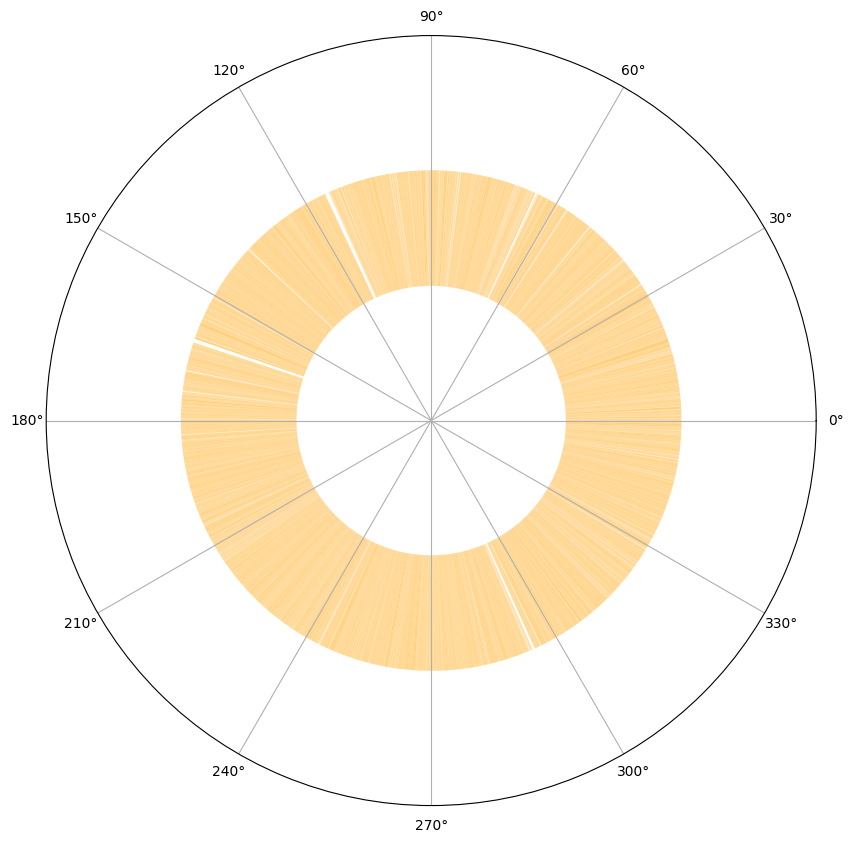

In [51]:
v('ann.gb')


/Users/li/opt/anaconda3/lib/python3.9/site-packages/Bio/SeqFeature.py:1940: BiopythonDeprecationWarning: Alias location.position is deprecated and will be removed in a future release. Use location directly, or int(location). However, that will fail for UnknownPosition, and for OneOfPosition and WithinPosition will give the default rather than left-most value.
  warnings.warn(


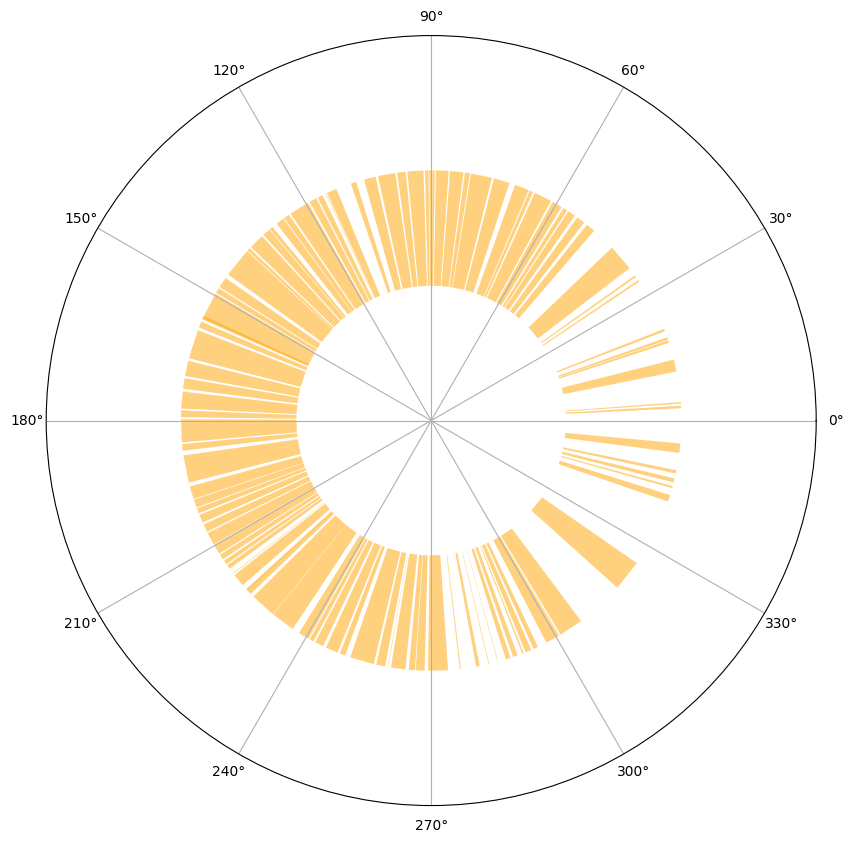

In [58]:
v('test.gb')

In [53]:
visualize_annotations('new.gb')